# Lab 4 

# 2 – Data Libraries

## You will see that the file does not have the name of the columns, so you will have to add manually those names.

Named collumns like this:

    sepal_l,sepal_w,petal_l,petal_w,class
    5.1,3.5,1.4,0.2,Iris-setosa
    4.9,3.0,1.4,0.2,Iris-setosa
    4.7,3.2,1.3,0.2,Iris-setosa

## Read the datafiles with pandas. And use the following function (head, tail and dtypes) just to see some elements of the database and their types.

Ignore this code, it's just to ignore warnings from sklearn

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Here's the actual code: 

In [2]:
# read the data from the file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the data from the file
iris_df = pd.read_csv('iris/iris.data', sep=',', decimal='.')

# use tail function to display the last 5 rows of the data
print("Tail:\n",iris_df.tail())

print("Head:\n",iris_df.head())

print("Dtypes:")
iris_df.dtypes


Tail:
      sepal_l  sepal_w  petal_l  petal_w           class
145      6.7      3.0      5.2      2.3  Iris-virginica
146      6.3      2.5      5.0      1.9  Iris-virginica
147      6.5      3.0      5.2      2.0  Iris-virginica
148      6.2      3.4      5.4      2.3  Iris-virginica
149      5.9      3.0      5.1      1.8  Iris-virginica
Head:
    sepal_l  sepal_w  petal_l  petal_w        class
0      5.1      3.5      1.4      0.2  Iris-setosa
1      4.9      3.0      1.4      0.2  Iris-setosa
2      4.7      3.2      1.3      0.2  Iris-setosa
3      4.6      3.1      1.5      0.2  Iris-setosa
4      5.0      3.6      1.4      0.2  Iris-setosa
Dtypes:


sepal_l    float64
sepal_w    float64
petal_l    float64
petal_w    float64
class       object
dtype: object

# 3 – Seaborn plots

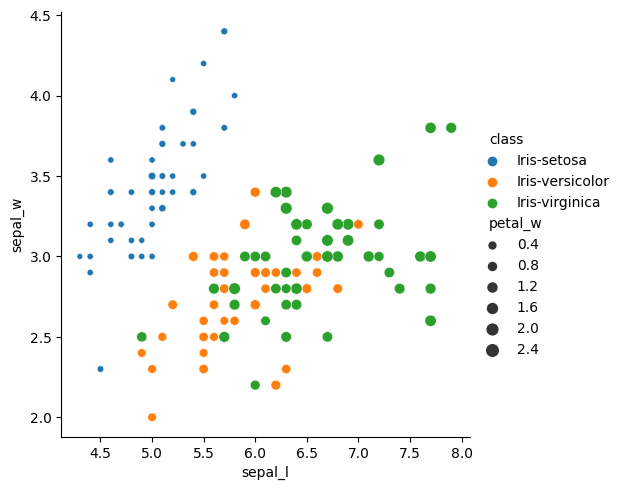

In [3]:
import seaborn as sns


# use relplot to plot the data
sns.relplot(x='sepal_l', y='sepal_w', size='petal_w',data=iris_df, hue='class')


# 4 – Scikit library

##### Now we are going to use the Scikit-learn library to try to identify the class of a sample from our database. To do that we need to train a model with part of the data and then test the model with the rest of the data. Scikit-learn has many different algorithms to perform the classification of the data. But all of them have similar interfaces so we can test several algorithms with just a few lines of code.

Find out what are the parameters “test_size” and “random_state”.

´train_size: float or int, default=None´

If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

´random_state: int, RandomState instance or None, default=None´
Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.



Accuracy of Naive Bayes: 0.9111111111111111
Accuracy of Linear SVC: 0.9111111111111111
Accuracy of SVM: 0.9555555555555556
Accuracy of K-Neighbours: 0.9555555555555556
Precision of Naive Bayes: 0.9155354449472096
Precision of Linear SVC: 0.9155354449472096
Precision of SVM: 0.9555555555555556
Precision of K-Neighbours: 0.9607843137254902
Recall of Naive Bayes: 0.9111111111111111
Recall of Linear SVC: 0.9111111111111111
Recall of SVM: 0.9555555555555556
Recall of K-Neighbours: 0.9555555555555556
Confusion Matrix of Naive Bayes:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Confusion Matrix of Linear SVC:
 [[15  0  0]
 [ 0 12  3]
 [ 0  1 14]]
Confusion Matrix of SVM:
 [[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
Confusion Matrix of K-Neighbours:
 [[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


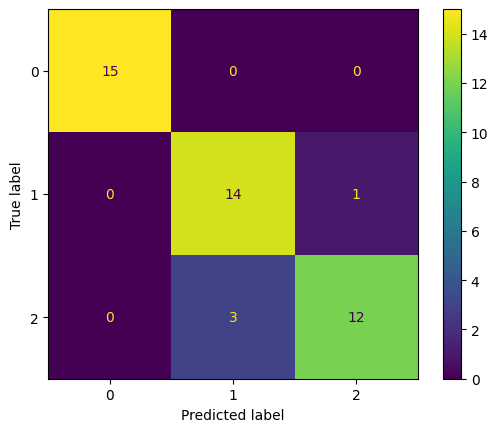

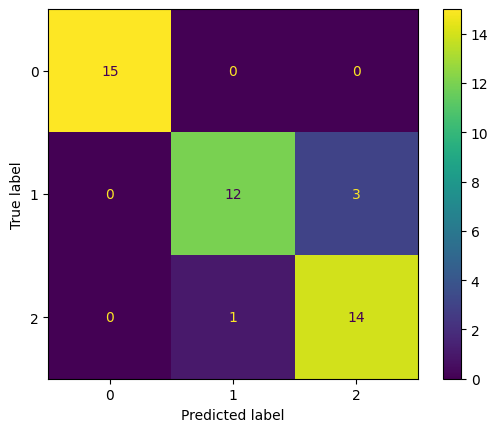

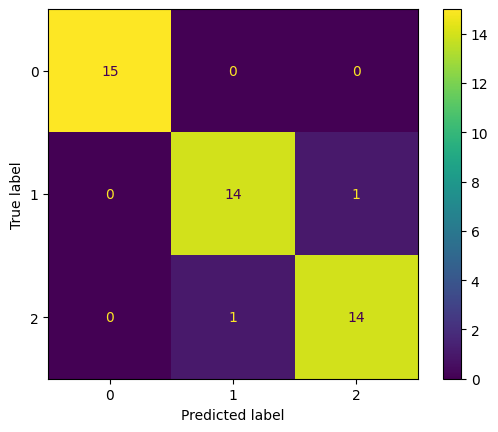

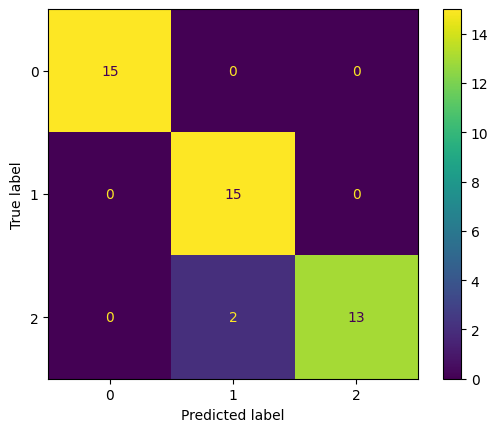

In [4]:
# import scikit
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# load the iris dataset
iris = datasets.load_iris()

#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42, stratify=iris.target)

# import Naive Bayes
from sklearn.naive_bayes import GaussianNB
#import linearSVC   
from sklearn.svm import LinearSVC
#import SVM
from sklearn import svm
#import K-Neighbours
from sklearn.neighbors import KNeighborsClassifier

#use naive bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#use linearSVC
lsvc = LinearSVC(random_state=0)
lsvc.fit(X_train, y_train)

#use SVM
svc = svm.SVC(random_state=0)
svc.fit(X_train, y_train)

#use K-Neighbours
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#predict the test data
y_pred = gnb.predict(X_test)
y_pred1 = lsvc.predict(X_test)
y_pred2 = svc.predict(X_test)
y_pred3 = knn.predict(X_test)

#print the accuracy
print("Accuracy of Naive Bayes:",accuracy_score(y_test, y_pred))
print("Accuracy of Linear SVC:",accuracy_score(y_test, y_pred1))
print("Accuracy of SVM:",accuracy_score(y_test, y_pred2))
print("Accuracy of K-Neighbours:",accuracy_score(y_test, y_pred3))

#print the precision
from sklearn.metrics import precision_score
print("Precision of Naive Bayes:",precision_score(y_test, y_pred, average='macro'))
print("Precision of Linear SVC:",precision_score(y_test, y_pred1, average='macro'))
print("Precision of SVM:",precision_score(y_test, y_pred2, average='macro'))
print("Precision of K-Neighbours:",precision_score(y_test, y_pred3, average='macro'))

#print the recall
from sklearn.metrics import recall_score
print("Recall of Naive Bayes:",recall_score(y_test, y_pred, average='macro'))
print("Recall of Linear SVC:",recall_score(y_test, y_pred1, average='macro'))
print("Recall of SVM:",recall_score(y_test, y_pred2, average='macro'))
print("Recall of K-Neighbours:",recall_score(y_test, y_pred3, average='macro'))

#print the confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix of Naive Bayes:\n",confusion_matrix(y_test, y_pred))
print("Confusion Matrix of Linear SVC:\n",confusion_matrix(y_test, y_pred1))
print("Confusion Matrix of SVM:\n",confusion_matrix(y_test, y_pred2))
print("Confusion Matrix of K-Neighbours:\n",confusion_matrix(y_test, y_pred3))

#ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gnb, X_test, y_test)
plot_confusion_matrix(lsvc, X_test, y_test)
plot_confusion_matrix(svc, X_test, y_test)
plot_confusion_matrix(knn, X_test, y_test)




# Conclusion 

In this case, the best algorithm is the SVM 